In [2]:
from IPython.display import clear_output
from dataGenerator import normal
from mnistDataLoder import *
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
class logisticRegression:
    def __init__(self, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2, size):
        self.mean_x1 = mx1
        self.var_x1 = vx1
        self.mean_y1 = my1
        self.var_y1 = vy1
        self.mean_x2 = mx2
        self.var_x2 = vx2
        self.mean_y2 = my2
        self.var_y2 = vy2
        self.n = size
        self.W = np.zeros([3, 1])
           
    def _generateData(self):
        self.x1 = normal(self.mean_x1, self.var_x1, self.n)
        self.y1 = normal(self.mean_y1, self.var_y1, self.n)
        self.classZero = np.zeros(self.n)
        self.x2 = normal(self.mean_x2, self.var_x2, self.n)
        self.y2 = normal(self.mean_y2, self.var_y2, self.n)
        self.classOne = np.ones(self.n)
    
    def _makeDesignMatrix(self):
        constantSet = np.ones(2 * self.n)
        featureOneSet = np.concatenate((self.x1, self.x2), axis=None)
        featureTwoSet = np.concatenate((self.y1, self.y2), axis=None)
        y = np.concatenate((self.classZero, self.classOne), axis=None)
        data = np.column_stack((constantSet, featureOneSet, featureTwoSet, y))
        data = data[np.argsort(data[:, 1])]
        self.X = data[:, 0:3]
        self.y = data[:, 3]
        self.y = np.reshape(self.y, (200, 1))

    def _makeGradient(self, X, y):
        right = y - (1 / (1 + np.exp(-np.matmul(X, self.W))))
        gradient = np.matmul(np.transpose(X), right)
        return gradient
    
    def _makeHession(self, X):
        D = np.zeros([len(X), len(X)])
        
        for i in range(len(X)):
            alpha = 1 / (1 + np.exp(-np.matmul(X[i], self.W)))
            D[i][i] = alpha * (1 - alpha)
                
        hession = np.matmul(np.transpose(X), D)
        hession = np.matmul(hession, X)
        
        return hession

    def drawData(self):
        self._generateData()
        plt.scatter(self.x1, self.y1, facecolors='none', edgecolors='green', marker='o')
        plt.scatter(self.x2, self.y2, color='blue', marker='+')
        
    def fit(self):
        self._makeDesignMatrix()       
        delta_w = np.Infinity
        threshold = 1e-10
        
        while delta_w > threshold:
            gradient = self._makeGradient(self.X, self.y)
            hession = self._makeHession(self.X)
            
            if np.linalg.det(hession) > 0:
                learningRate = np.linalg.inv(hession)
            else:
                learningRate = 1e-5
            
            w_new = self.W + np.dot(learningRate, gradient)
            delta_w = np.abs(np.sum(self.W - w_new))
            self.W = w_new
    
    
    def getResult(self):
        predictOneIndices, _ = np.where((1 / (1 + np.exp(-np.dot(self.X, self.W)))) <= 1e-5)
        predictTwoIndices, _ = np.where((1 / (1 + np.exp(-np.dot(self.X, self.W)))) > 1e-3)
        print(predictOneIndices)
        print(predictTwoIndices)
        
        TP = len(np.where(predictOneIndices < self.n)[0])
        FP = len(np.where(predictOneIndices >=  self.n)[0])
        FN = len(np.where(predictTwoIndices < self.n)[0]) 
        TN = len(np.where(predictTwoIndices >= self.n)[0]) 
        
        confusionMatrix = [[TP, FP], [FN, TN]]
        confusionMatrixPlot = pd.DataFrame(confusionMatrix, index = ['Yes', 'No'], columns = ['Yes', 'No'])
        plt.figure(figsize = (2, 2))
        sn.heatmap(confusionMatrixPlot, annot=True)
        plt.show()
        print('Accuracy=', (TP + TN) / (2 * self.n))
        print('Sensitivity=', TP / (TP + FN))
        print('Specificity=', TN / (FP + TN))

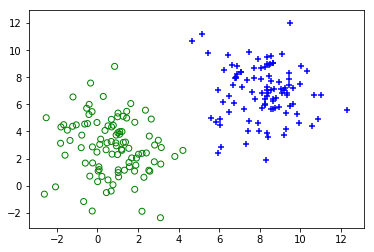

In [4]:
model = logisticRegression(1, 2, 3, 4, 8, 2, 7, 4, 100)
model.drawData()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]


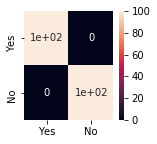

Accuracy= 1.0
Sensitivity= 1.0
Specificity= 1.0


In [5]:
model.fit()
model.getResult()

In [6]:
class BernuliiMixtureModel:
    def __init__(self, X, y):
        self.X, self.y = X, y
        #assumptoin parameters
        self.lamda = np.zeros(10) + 0.1
        self.W = np.zeros([60000, 10])
        self.P = np.zeros([10, 784]) + np.random.uniform(0, 1, (10, 784))
        
    def _normalizePixel(self):
        self.X = np.floor(self.X / 128)

    def _getWeight(self):
        for i in range(60000):
            x = self.X[i]
            weightVector = np.empty(10)
            weightVector = self.lamda * np.prod(np.power(self.P, x.T) * np.power(1-self.P, 1-x.T), axis=1) + 1e-323
            weightSum = np.sum(weightVector)
            self.W[i] = weightVector / weightSum
            
    def _updateParameters(self):
        for i in range(10):
            w = self.W[:, i]
            m = np.sum(w)
            self.lamda[i] = m / 60000
            self.P[i] = np.dot(w, self.X) / m

    def _visualizeCluster(self):
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(self.P[i].reshape(28, 28), cmap='gray',vmax=1, vmin=0)

    def fit(self):
        self._normalizePixel()
        previous = 0
        delta = np.Infinity
        i = 0
        
        while i < 20 or delta > 50:
            clear_output(wait=True)
            self._getWeight()
            self._updateParameters()
            self._visualizeCluster()
                    
            predictClusters = np.argmax(self.W , axis=1)
            predictClustersCount = np.bincount(predictClusters)
            delta = np.sum(np.abs(predictClustersCount - previous))
            previous = predictClustersCount
            
            print('Iteration:', i+1)  
            print('Totoal Result=', predictClustersCount, 'Delta=', delta)
            plt.show()
            i += 1
                
    def getResult(self):
        predictClusters = np.argmax(self.W, axis = 1)
        print('Clusters final result=', np.bincount(predictClusters))
        predictionLabel = np.zeros(10) ## predict real label 1~10 for wi to w10
        for i in range(10):
            realLabelIndices = np.where(self.y == i)[0]
            predictionList = predictClusters[realLabelIndices]
            predictionLabel[i] = np.argmax(np.bincount(predictionList))
        print(predictionLabel)
        
        for i in range(10):
            realLabelIndices = np.where(self.y == i)[0]
            realLabelIndicesInvert = np.where(self.y != i)[0]

            predLabelIndices = np.where(predictClusters == predictionLabel[i])[0]
            predLabelIndicesInvert = np.where(predictClusters != predictionLabel[i])[0]

            TP = len(np.where(np.in1d(predLabelIndices, realLabelIndices))[0])
            TN = len(np.where(np.in1d(predLabelIndicesInvert, realLabelIndicesInvert))[0])

            FP = len(np.where(np.in1d(predLabelIndices, realLabelIndicesInvert))[0])
            FN = len(np.where(np.in1d(predLabelIndicesInvert, realLabelIndices))[0])
            
            print('Confusion matrix of digit:', i)
            confusionMatrix = [[TP, FP], [FN, TN]]
            confusionMatrixPlot = pd.DataFrame(confusionMatrix, index = ['Yes', 'No'],
                  columns = ['Yes', 'No'])
            plt.figure(figsize = (2, 2))
            sn.heatmap(confusionMatrixPlot, annot=True)
            plt.show()
            print('Accuracy=', (TP + TN) / 60000)
            print('Sensitivity=', TP / (TP + FN))
            print('Specificity=', TN / (FP + TN))
            

Iteration: 38
Totoal Result= [5894 6360 6725    0 8714 9486 6963 5755 4981 5122] Delta= 166


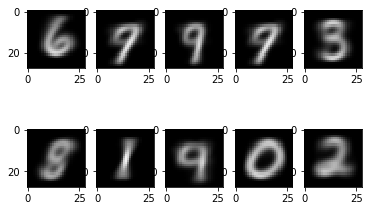

In [ ]:
X, y = loadTrainData()
bmm = BernuliiMixtureModel(X, y)
bmm.fit()

In [ ]:
bmm.getResult()